<a id='Q0'></a>
<center><a target="_blank" href="https://sit.academy/"><img src="https://drive.google.com/uc?id=1z0U84GYqhbWWpCenFajh8_8XFRGyOc3U" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>
<center> <h1> Notebook #: Bayes Analysis of IBM Attrition Data Set </h1> </center>
<p style="margin-bottom:1cm;"></p>
<center><h4>SIT Academy, 2022</h4></center>
<p style="margin-bottom:1cm;"></p>

<div style="background:#EEEDF5;border-top:0.1cm solid #EF475B;border-bottom:0.1cm solid #EF475B;">
    <div style="margin-left: 0.5cm;margin-top: 0.5cm;margin-bottom: 0.5cm;color:#303030">
        <p><strong>Goal:</strong> Aim of the notebook is to apply the gaussian naive bayes algorithm </p>
        <strong> Outline:</strong>
        <a id='P0' name="P0"></a>
        <ol>
            <li> <a style="color:#303030" href='#I'>Introduction </a> </li>
            <li> <a style="color:#303030" href='#SU'>Set up</a></li>
            <li> <a style="color:#303030" href='#P1'>Part 1</a></li>
            <li> <a style="color:#303030" href='#P2'>Part 2</a></li>
            <li> <a style="color:#303030" href='#P3'>Part 3</a></li>
            <li> <a style="color:#303030" href='#CL'>Conclusion</a></li>
        </ol>
        <strong>Keywords:</strong> data cleaning, NLP, ... list of keywords.
    </div>
</div>
</nav>

<a id='I' name="I"></a>
## [Introduction](#P0)

Here you could write an introduction to the topics. Everything that is written here will appear in the live coding template notebook

<a id='SU' name="SU"></a>
## [Set up](#P0)

### Magics

In [1]:
# auto reload packages and modules when they are modified
%load_ext autoreload
%autoreload 2
# draw matplotlib plots in line
%matplotlib inline
# enforce PEP 8 code on jupyter lab ...

# ... or jupyter notebook
# %load_ext nb_black

### Packages

In [2]:
# General
import pandas as pd
import numpy as np

# modelling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt




### Custom classes and functions

In [279]:
import sys
SCRIPT_DIR = "../src"
sys.path.append(SCRIPT_DIR)

In [280]:
from template_module import my_function_name

### Global Parameters Setting

In [281]:
plt.style.use("seaborn")

### User-Dependent Variables

In [282]:
url_features = "../data/WA_Fn-UseC_-HR-Employee-Attrition.csv"  # path to data file

<a id='P1'></a>
## [Part one](#P0)

Exploratory data analysis.

Assumptions Made by Naïve Bayes
 
The fundamental Naïve Bayes assumption is that each feature makes an:

-independent

-equal --> to research bayes with weights

contribution to the outcome.


In [7]:
df_raw=pd.read_csv(url_features)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [36]:
df_raw.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
##columns to drop based on histogram plots: these column provide no additional informations: 'DailyRate','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours'
##columns to drop after reviewing correlation numbers: MonthlyIncome, PercentSalaryHike, TotalWorkingYears

In [284]:
df=df_raw.drop(columns=['DailyRate','EmployeeNumber','HourlyRate','MonthlyRate','StandardHours','Over18'])

'''
def encodeTravel(row):
    if row['BusinessTravel'] =='Non-Travel':
        return 1
    if row['BusinessTravel']=='Travel_Rarely':
        return 2
    if row['BusinessTravel'] =='Travel_Frequently':
        return 3
def encodeGender(row):
    if row['Gender'] =='Female':
        return 1
    if row['Gender']=='Male':
        return 2
def encodeStatus(row):
    if row['MaritalStatus'] =='Single':
        return 1
    if row['MaritalStatus']=='Married':
        return 2  
    if row['MaritalStatus']=='Divorced':
        return 3 

df['TravelCode']=df.apply(lambda row: encodeTravel(row), axis=1)
df['GenderCode']=df.apply(lambda row: encodeGender(row), axis=1)
df['MaritalStatusCode']=df.apply(lambda row: encodeStatus(row), axis=1)
'''

In [236]:
def encodeAttrition(row):
    if row['Attrition'] =='No':
        return 0
    if row['Attrition']=='Yes':
        return 1
df['AttritionCode']=df.apply(lambda row: encodeAttrition(row), axis=1)

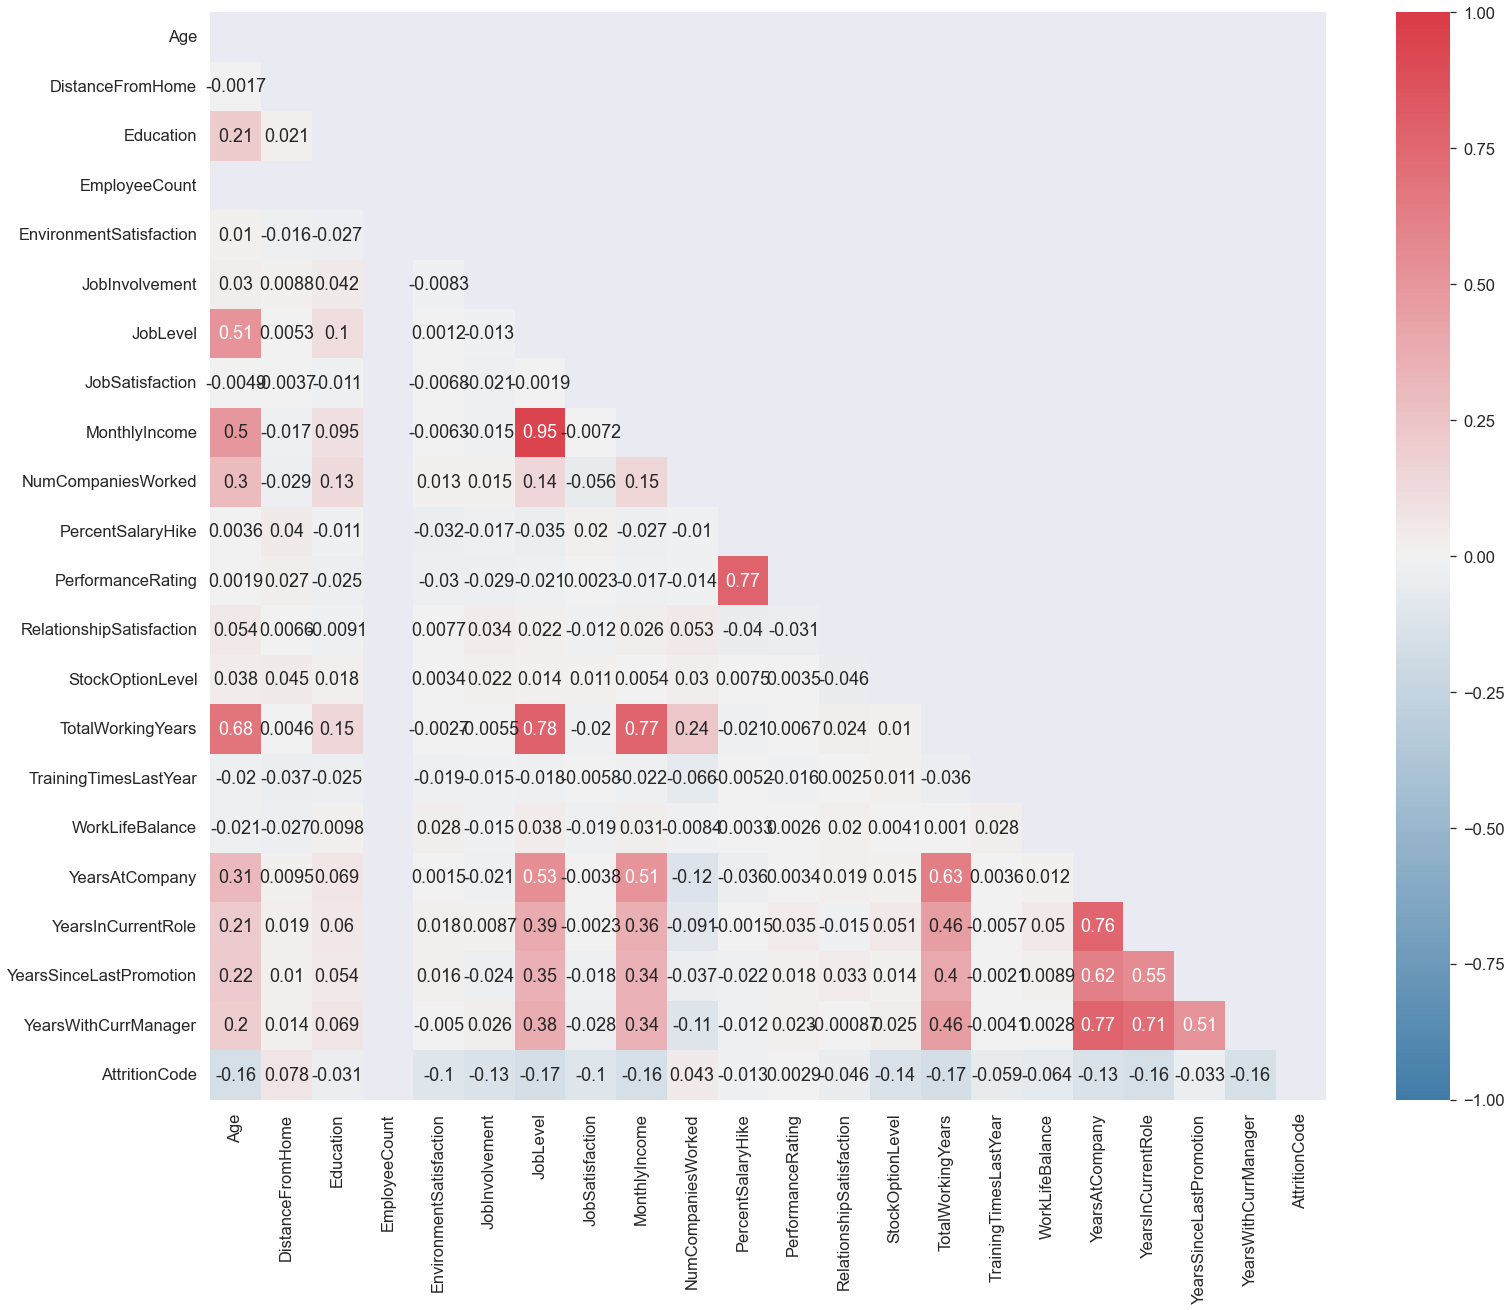

In [237]:
corr = df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.set(font_scale=1.5)
fig,ax=plt.subplots(figsize=(25,20))

fig=sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True
);


In [278]:
corr = df.corr()
corr = corr.mask(corr.apply(lambda x: x.name == x.index))

most_correlated = corr.abs(
    ).unstack(
        ).drop_duplicates(
            ).sort_values(ascending = False)[:5]

most_correlated

JobLevel           MonthlyIncome           0.950300
                   TotalWorkingYears       0.782208
PercentSalaryHike  PerformanceRating       0.773550
MonthlyIncome      TotalWorkingYears       0.772893
YearsAtCompany     YearsWithCurrManager    0.769212
dtype: float64

In [238]:
corr


,Age,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionCode
Age,1.000000,-0.001686,0.208034,NaN,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DistanceFromHome,-0.001686,1.000000,0.021042,NaN,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,0.021042,1.000000,NaN,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,NaN,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
JobInvolvement,0.029820,0.008783,0.042438,NaN,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.005303,0.101589,NaN,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,-0.003669,-0.011296,NaN,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,-0.017014,0.094961,NaN,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840
NumCompaniesWorked,0.299635,-0.029251,0.126317,NaN,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,...,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319,0.043494


In [239]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [322]:
len(df.columns)

29

In [323]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

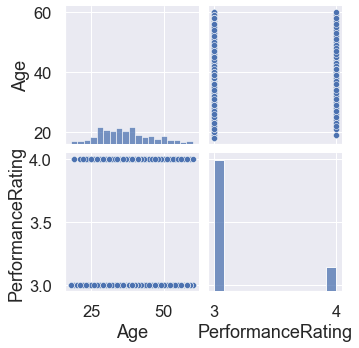

In [241]:
sns.pairplot(df[['Age','PerformanceRating']])

In [242]:
resigned=df[df['Attrition']=='Yes']['EmployeeCount'].sum()
survived=df[df['Attrition']=='No']['EmployeeCount'].sum()
total=df['EmployeeCount'].sum()
resigned, survived, total

(237, 1233, 1470)

In [243]:
p_resigned=resigned/total
p_survived=survived/total
p_resigned, p_survived

(0.16122448979591836, 0.8387755102040816)

In [244]:
df['DistanceFromHome'].mean()

9.19251700680272

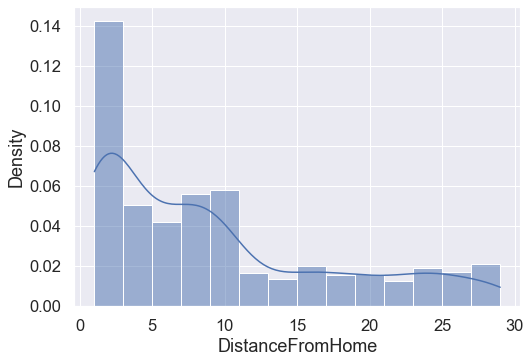

In [245]:
sns.histplot(x='DistanceFromHome', data=df, kde=True, cumulative=False, stat='density');

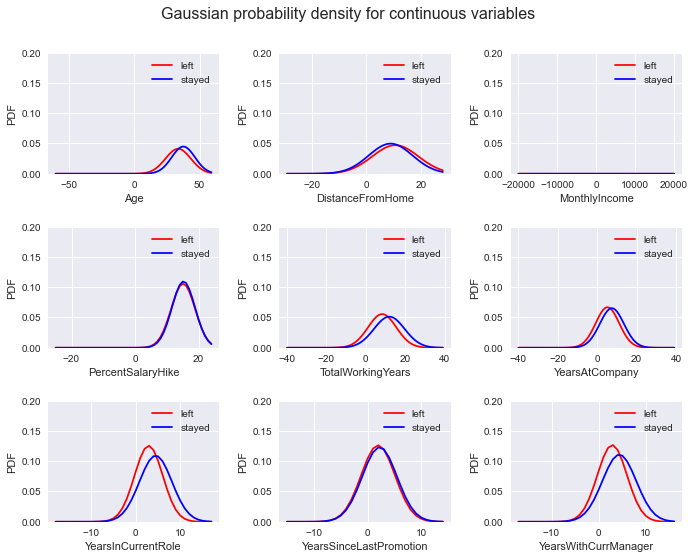

In [337]:
from scipy.stats import norm

cols_toplot=['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
fig, axs = plt.subplots(3,3,figsize=(10,8))
YLIMS = [0, 0.2]
for i, col in enumerate(cols_toplot):
    x=range(0-df[col].max(),df[col].max())
    pdf_densities_left = norm.pdf(x, loc=df[df['Attrition']=='Yes'][col].mean(), scale=np.std(df[df['Attrition']=='Yes'][col],ddof=1))
    pdf_densities_stayed = norm.pdf(x, loc=df[df['Attrition']=='No'][col].mean(), scale=np.std(df[df['Attrition']=='No'][col],ddof=1))
    axs[i//3,i%3].plot(x, pdf_densities_left,color='red')
    axs[i//3,i%3].plot(x, pdf_densities_stayed,color='blue')
    axs[i//3,i%3].set_xlabel(col)
    axs[i//3,i%3].set_ylabel('PDF')
    axs[i//3,i%3].set_ylim(YLIMS)
    axs[i//3,i%3].legend(['left', 'stayed'])
    plt.tight_layout()

    fig.suptitle('Gaussian probability density for continuous variables', fontsize=16)

plt.savefig('pic.jpeg')


In [345]:
categorical_variables = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 
                         'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                         'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
likelihood={}
for cat_val in categorical_variables:
    likelihood[cat_val] = df.groupby(['Attrition', cat_val]).size().div(len(df))
likelihood

{'BusinessTravel': Attrition  BusinessTravel   
 No         Non-Travel           0.093878
            Travel_Frequently    0.141497
            Travel_Rarely        0.603401
 Yes        Non-Travel           0.008163
            Travel_Frequently    0.046939
            Travel_Rarely        0.106122
 dtype: float64,
 'Department': Attrition  Department            
 No         Human Resources           0.034694
            Research & Development    0.563265
            Sales                     0.240816
 Yes        Human Resources           0.008163
            Research & Development    0.090476
            Sales                     0.062585
 dtype: float64,
 'Education': Attrition  Education
 No         1            0.094558
            2            0.161905
            3            0.321769
            4            0.231293
            5            0.029252
 Yes        1            0.021088
            2            0.029932
            3            0.067347
            4            0.0

In [248]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AttritionCode'],
      dtype='object')

In [270]:
X=df[['DistanceFromHome','JobInvolvement', 'YearsSinceLastPromotion','Age','JobLevel','PerformanceRating','YearsWithCurrManager']]
y=(df['AttritionCode']).to_numpy()
train_X, test_X, train_y, test_y = train_test_split(X, y,train_size=0.90, random_state=7)

In [271]:
from sklearn.naive_bayes import GaussianNB

In [272]:
gbn=GaussianNB()
gbn.fit(train_X,train_y)

GaussianNB()

In [273]:
y_pred_train=gbn.predict(train_X)
my_list=[True for i in range(len(train_y))]
class_0_correct=0
class_1_correct=0
class_0_wrong=0
class_1_wrong=0
for i in range(len(train_y)):
    if train_y[i] == y_pred_train[i]:
        my_list[i]=True
    else:
        my_list[i]=False

for i in range(len(train_y)):
    if train_y[i]==0:
        if my_list[i]==True:
            class_0_correct+=1
        else:
            class_0_wrong+=1
    else:
        if my_list[i]==True:
            class_1_correct+=1
        else:
            class_1_wrong+=1
        
        
dict={'correct':[class_0_correct,class_1_correct],'wrong':[class_0_wrong,class_1_wrong],'%correct':[class_0_correct/(class_0_correct+class_0_wrong),class_1_correct/(class_1_correct+class_1_wrong)]}    
res=pd.DataFrame(data=dict)
res

,correct,wrong,%correct
0,1068,43,0.961296
1,44,168,0.207547


In [274]:
from sklearn.metrics import classification_report
y_pred_train=gbn.predict(train_X)

gbn.score(train_X,train_y)
print(classification_report(train_y, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1111
           1       0.51      0.21      0.29       212

    accuracy                           0.84      1323
   macro avg       0.68      0.58      0.60      1323
weighted avg       0.81      0.84      0.81      1323



In [268]:
y_pred_test=gbn.predict(test_X)

gbn.score(test_X,test_y)

0.8206521739130435

In [269]:

print(classification_report(test_y, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       312
           1       0.35      0.21      0.27        56

    accuracy                           0.82       368
   macro avg       0.61      0.57      0.58       368
weighted avg       0.79      0.82      0.80       368



### Subsection 1

This is a subsection. It can either be tagged as a hint, a solution or not tagged.

<div style="background:#EEEDF5;color:#303030"><div style="margin-left: .2cm">
    <b>Comments:</b>
</div></div>

<div style="margin-left: 0.4cm">
    This Markdown cell is a template to write extended comments. e.g. explain the approach taken, or concepts behind algorithm chosen. Aim at having 2 lines at least. Anything smaller can be directly integrated in the code, or gathered together with other comments to form a bigger paragraph. Since this block is within a div element, you need to use html formatting syntax, not markdown
</div>

<div style="background:#EEEDF5;border:0.1cm solid #FDB100;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#FDB100">Title:</b> 
        This is a an example yellow box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #00BAE5;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#00BAE5">Note:</b>
        This is an example Blue Box
    </div>
</div>

<div style="background:#EEEDF5;border:0.1cm solid #EF475B;color:#303030">
    <div style="margin: 0.2cm 0.2cm 0.2cm 0.2cm">
        <b style="color:#EF475B">Warning:</b> 
        This is an example red box
    </div>
</div>

<a id='P2' name="P2"></a>
## [Part 2 title here](#P0)

<a id='P3' name="P3"></a>
## [Part 3 title here](#P0)

<a id='CL'></a>
## [Conclusion](#P0)

This is a pre-written conclusion in which we have nice figures.

<div style="border-top:0.1cm solid #EF475B"></div>
    <strong><a href='#Q0'><div style="text-align: right"> <h3>End of this Notebook.</h3></div></a></strong>